<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/140_DOE_TRES_FACTORES2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tematica: Diseño Factorial con Tres Factores**
## **1. Nuestras librerias**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
!pip install bioinfokit &>/dev/null
from bioinfokit.analys import stat
from statsmodels.graphics.factorplots import interaction_plot

## **2. El Problema**

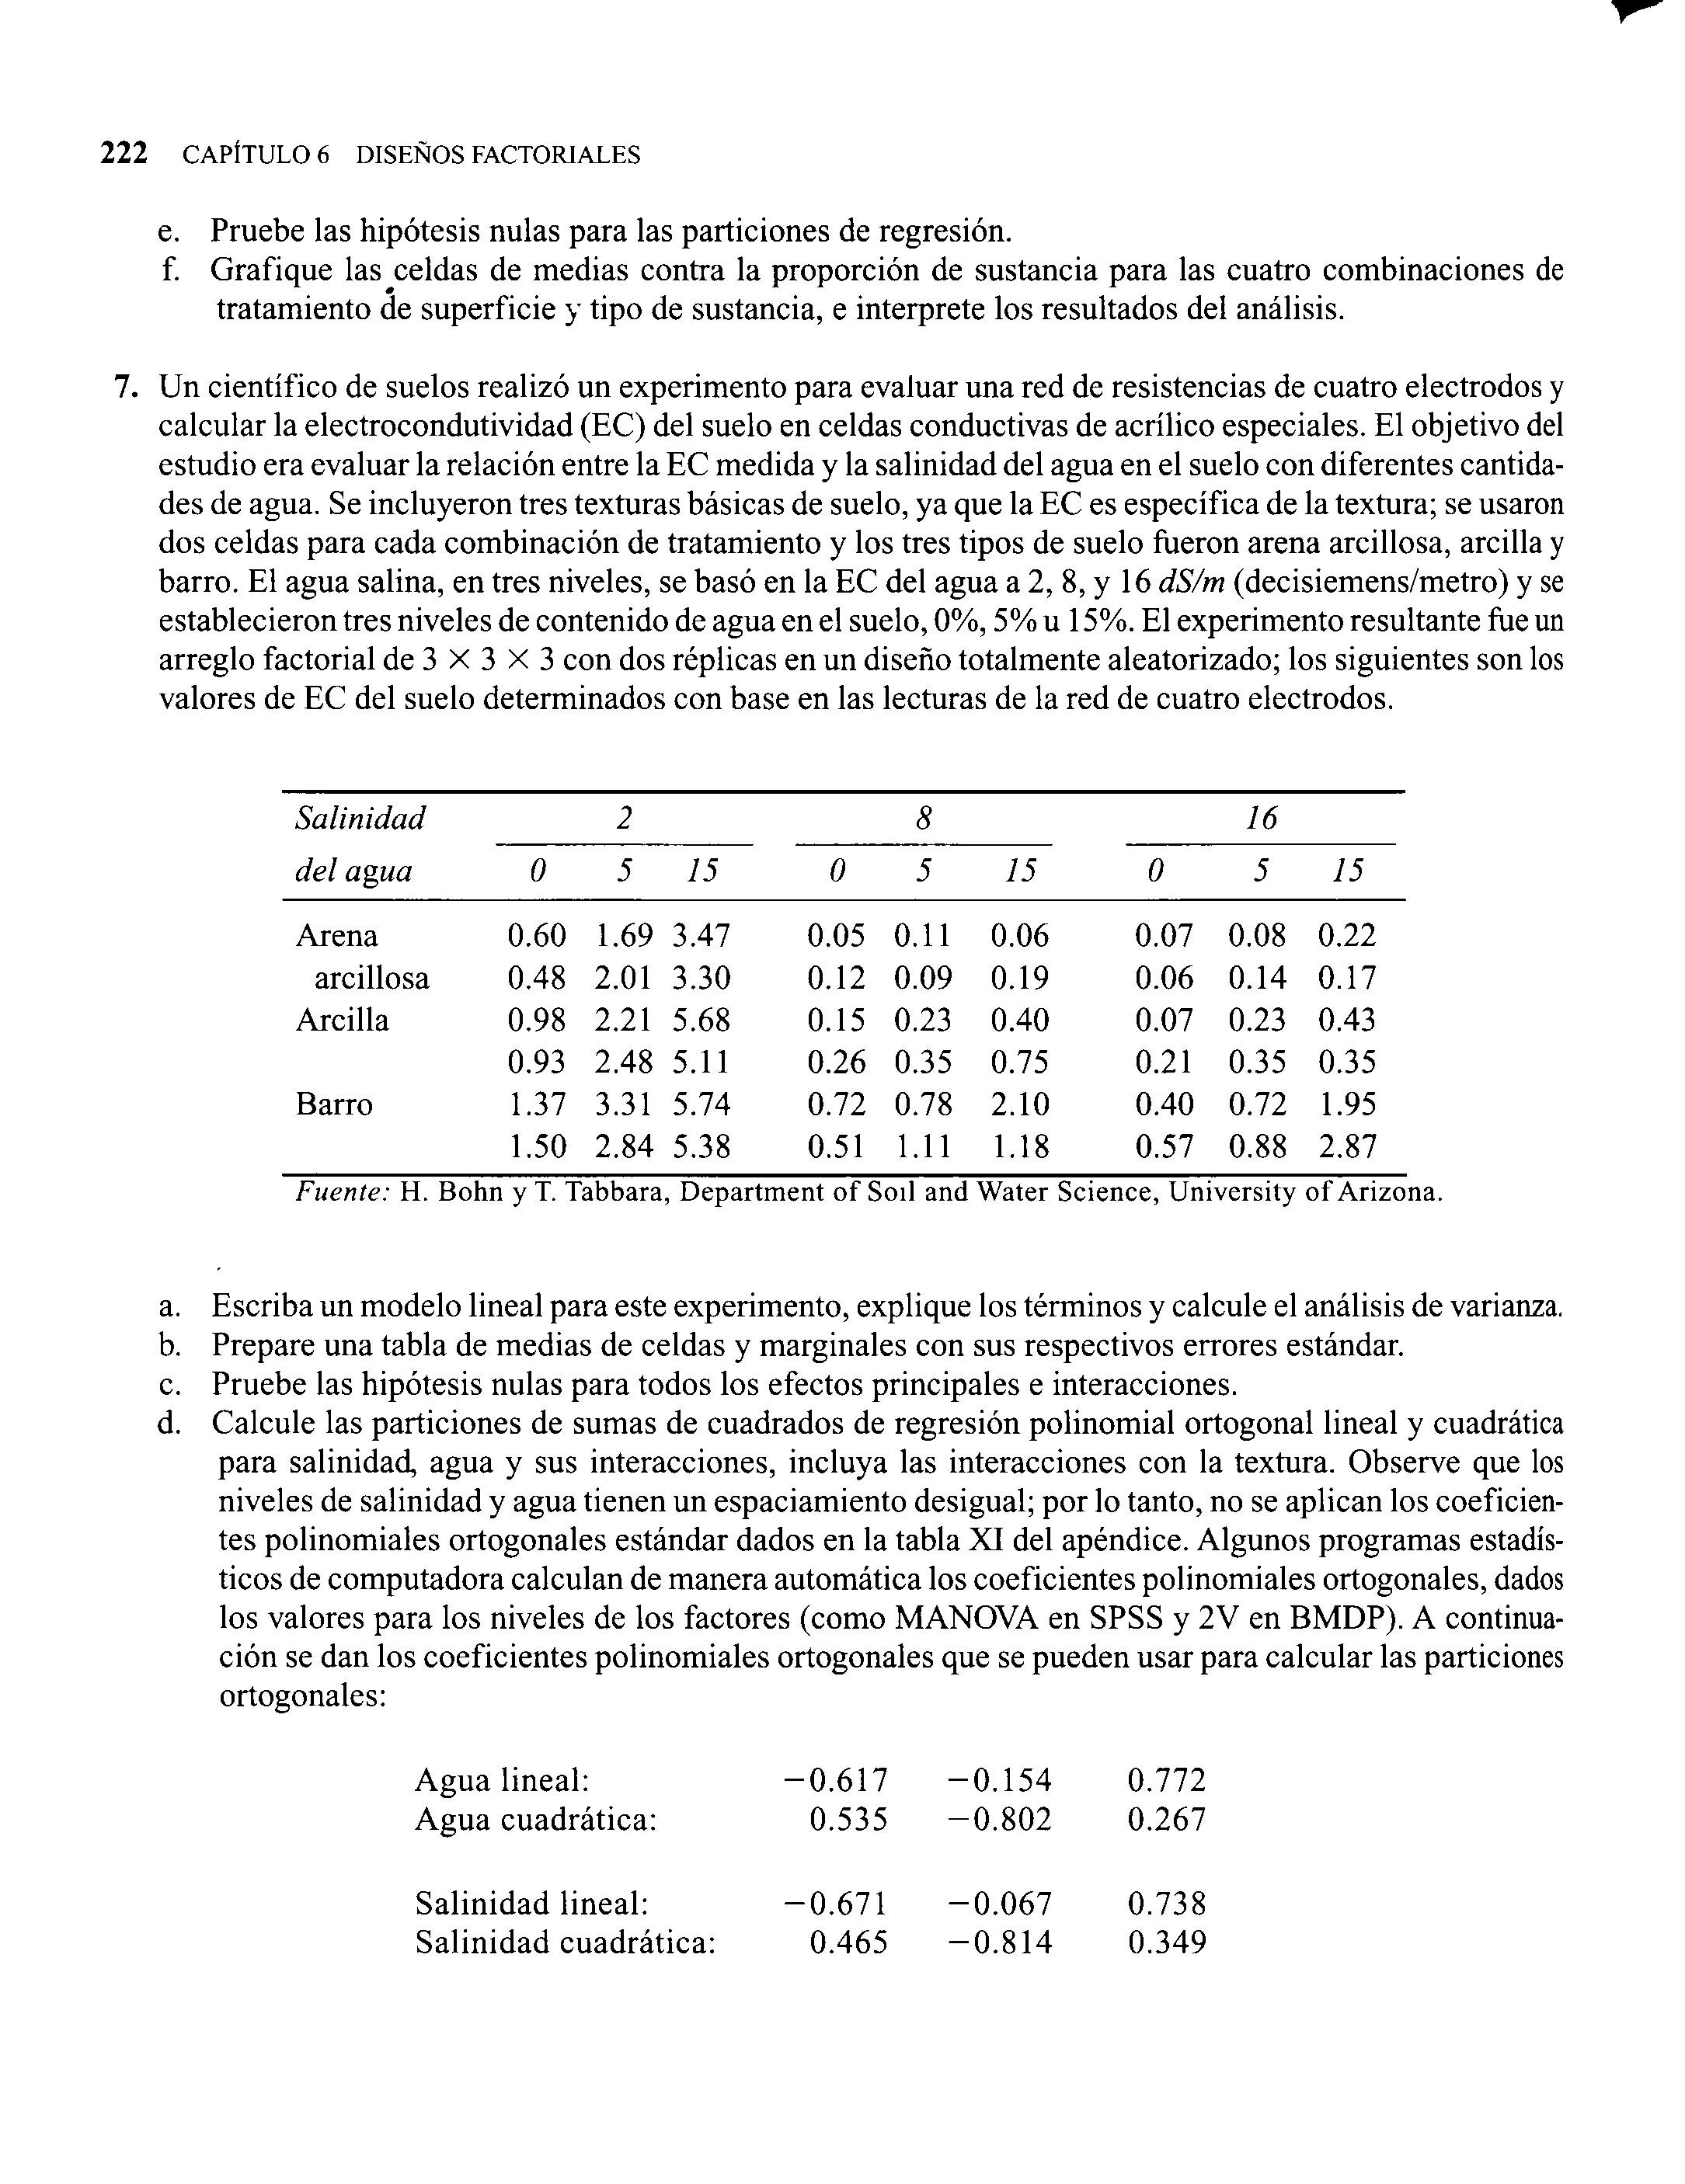

## **3. Importando una base de datos a Python**

In [ ]:
import cv2 as cv
from google.colab import files
uploaded=files.upload()

Saving DOE_SUELO2.csv to DOE_SUELO2.csv


In [ ]:
datos=pd.read_csv("DOE_SUELO2.csv", delimiter=';')

In [ ]:
datos.head()

,A,B,C,f
0,ARENA,2,0,0.60
1,ARENA,2,0,0.48
2,ARENA,2,5,1.69
3,ARENA,2,5,2.01
4,ARENA,2,15,3.47


In [ ]:
datos.columns

Index(['A', 'B', 'C', 'f'], dtype='object')

## **4. Diagrama de caja y Bigotes**

In [ ]:
import seaborn as sns

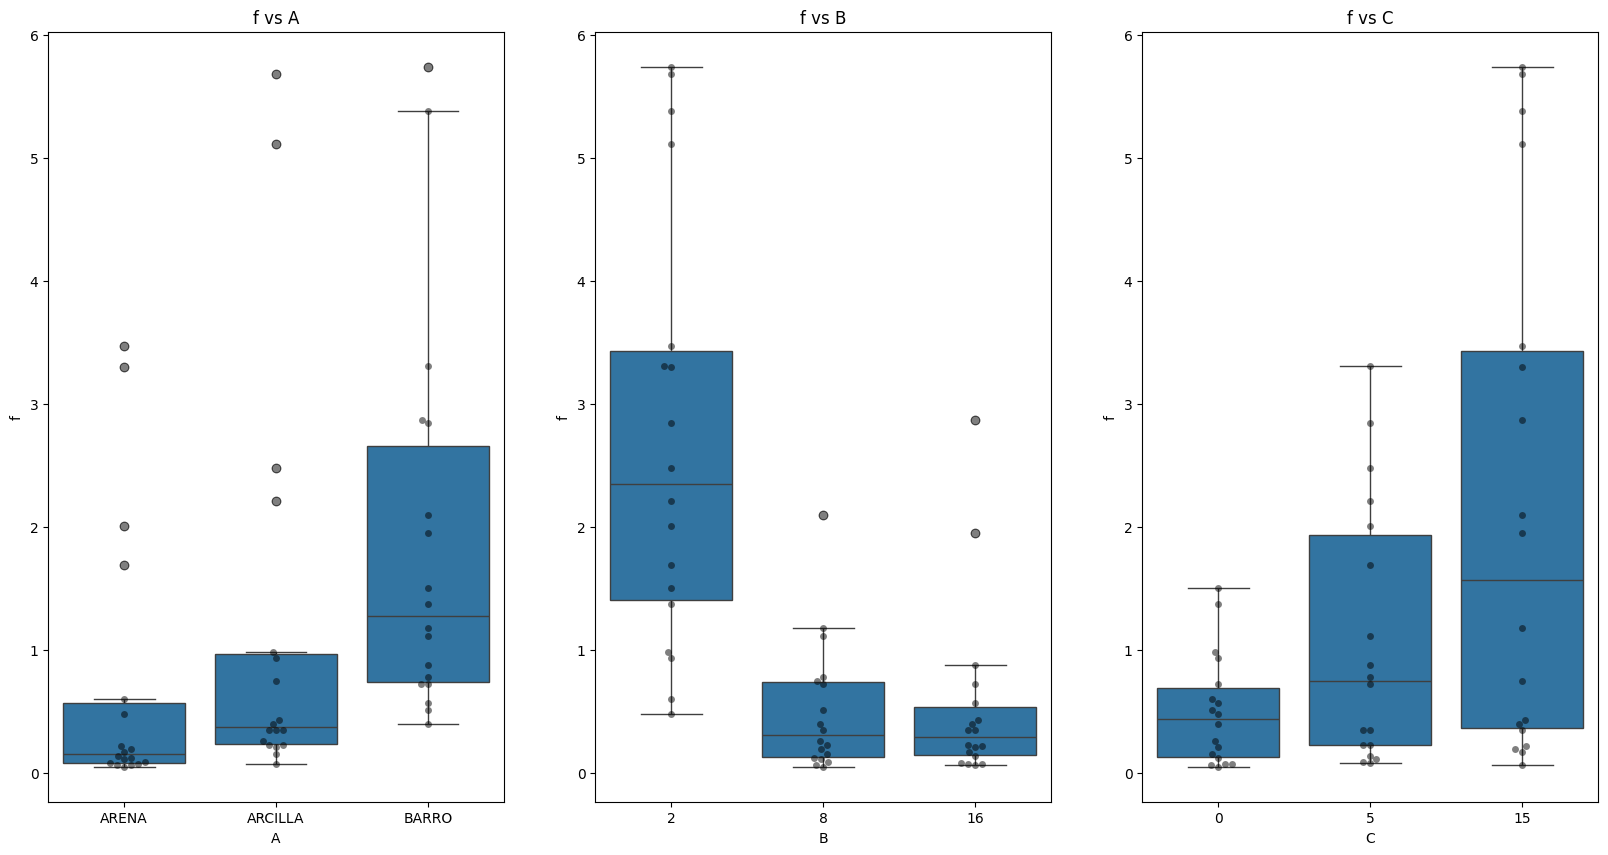

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
axs[0].set_title('f vs A')
sns.boxplot(x="A", y="f", data=datos, ax=axs[0])
sns.swarmplot(x="A", y="f", data=datos, color='black',
              alpha = 0.5, ax=axs[0])

axs[1].set_title('f vs B')
sns.boxplot(x="B", y="f", data=datos, ax=axs[1])
sns.swarmplot(x="B", y="f", data=datos, color='black',
              alpha = 0.5, ax=axs[1]);

axs[2].set_title('f vs C')
sns.boxplot(x="C", y="f", data=datos, ax=axs[2])
sns.swarmplot(x="C", y="f", data=datos, color='black',
              alpha = 0.5, ax=axs[2]);

## **5. Diagrama de caja y Bigotes Bidimensional**

<Axes: title={'center': 'f vs B y C'}, xlabel='B', ylabel='f'>

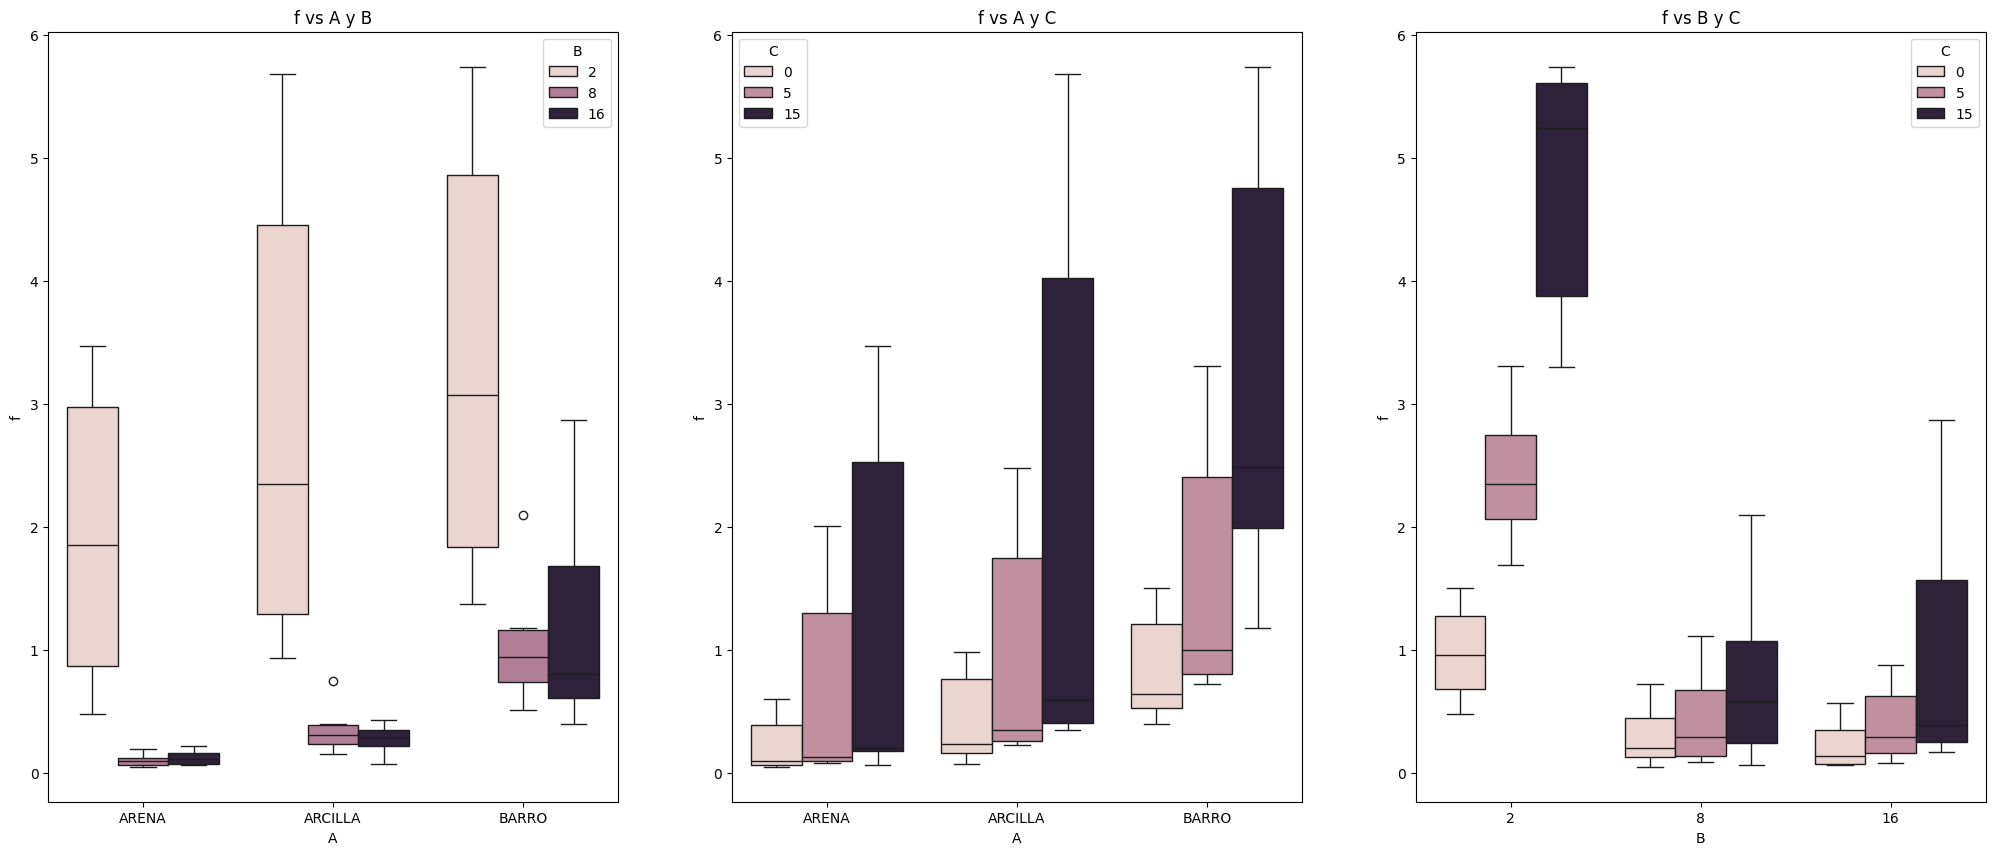

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(25, 10))
axs[0].set_title('f vs A y B')
sns.boxplot(x="A", y="f", hue = "B", data=datos, ax=axs[0]);
axs[1].set_title('f vs A y C')
sns.boxplot(x="A", y="f", hue = "C", data=datos, ax=axs[1])
axs[2].set_title('f vs B y C');
sns.boxplot(x="B", y="f", hue = "C", data=datos, ax=axs[2])

# **5. Media y desviación estandar para cada factor de interés**

In [ ]:
print('f media y desviación típica para A')
datos.groupby('A')['f'].agg(['mean', 'std'])


f media y desviación típica para A


,mean,std
A,,
ARCILLA,1.176111,1.677811
ARENA,0.717222,1.120577
BARRO,1.885000,1.596339


In [ ]:
print('f media y desviación típica para B')
datos.groupby('B')['f'].agg(['mean', 'std'])


f media y desviación típica para B


,mean,std
B,,
2,2.726667,1.763479
8,0.508889,0.532739
16,0.542778,0.733956


# **6. Media y desviación estandard para toda la base de datos**

In [ ]:
print('f media y desviación típica para B')
datos.groupby(['A', 'B', 'C'])['f'].agg(['mean', 'std'])

f media y desviación típica para B


mean       std
A       B  C                  
ARCILLA 2  0   0.955  0.035355
           5   2.345  0.190919
           15  5.395  0.403051
        8  0   0.205  0.077782
           5   0.290  0.084853
           15  0.575  0.247487
        16 0   0.140  0.098995
           5   0.290  0.084853
           15  0.390  0.056569
ARENA   2  0   0.540  0.084853
           5   1.850  0.226274
           15  3.385  0.120208
        8  0   0.085  0.049497
           5   0.100  0.014142
           15  0.125  0.091924
        16 0   0.065  0.007071
           5   0.110  0.042426
           15  0.195  0.035355
BARRO   2  0   1.435  0.091924
           5   3.075  0.332340
           15  5.560  0.254558
        8  0   0.615  0.148492
           5   0.945  0.233345
           15  1.640  0.650538
        16 0   0.485  0.120208
           5   0.800  0.113137
           15  2.410  0.650538

In [ ]:
print('f media y desviación típica para C')
datos.groupby('C')['f'].agg(['mean', 'std'])

f media y desviación típica para C


,mean,std
C,,
0,0.502778,0.448551
5,1.089444,1.060485
15,2.186111,2.116638


# **7. Diagramas de interacción**

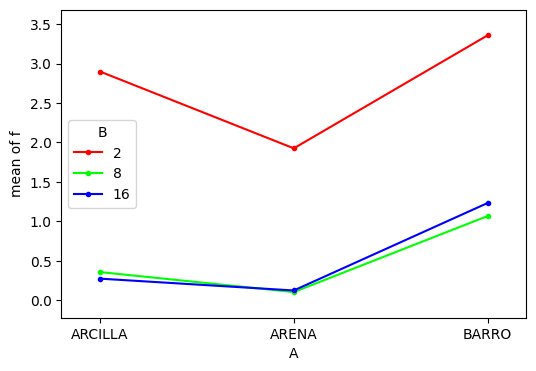

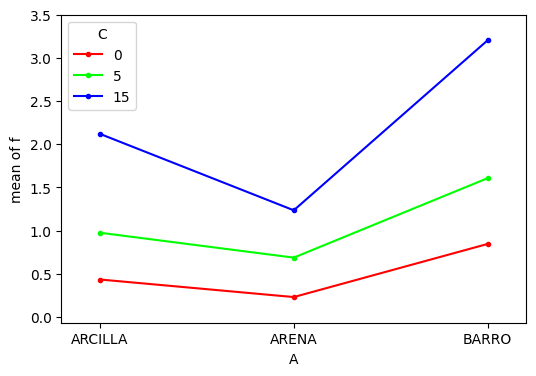

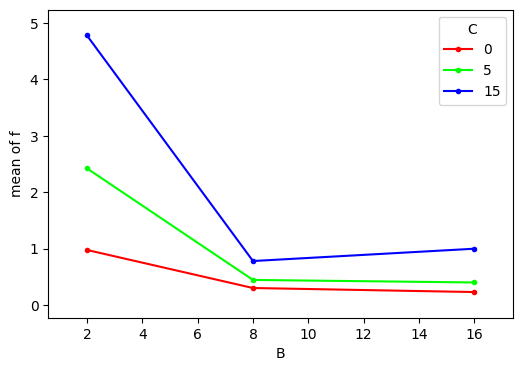

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.A,
    trace    = datos.B,
    response = datos.f,
    ax       = ax,
)
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.A,
    trace    = datos.C,
    response = datos.f,
    ax       = ax,
)
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.B,
    trace    = datos.C,
    response = datos.f,
    ax       = ax,
)

# **8. Anova para el diseño factorial**

In [ ]:
!pip install pingouin &>/dev/null

In [ ]:
import pingouin as pg

In [ ]:
pg.anova(
    data     = datos,
    dv       = 'f',
    between  = ['A', 'B'],
    detailed = True
).round(6)

,Source,SS,DF,MS,F,p-unc,np2
0,A,12.460844,2,6.230422,5.279550,0.008715,0.190052
1,B,58.134344,2,29.067172,24.631009,0.000000,0.522607
2,A * B,1.284578,4,0.321144,0.272132,0.894405,0.023618
3,Residual,53.104717,45,1.180105,NaN,NaN,NaN


In [ ]:
pg.anova(
    data     = datos,
    dv       = 'f',
    between  = ['A', 'C'],
    detailed = True
).round(6)

,Source,SS,DF,MS,F,p-unc,np2
0,A,12.460844,2,6.230422,3.369650,0.043283,0.130255
1,C,26.282800,2,13.141400,7.107371,0.002078,0.240054
2,A * C,3.036656,4,0.759164,0.410585,0.800063,0.035211
3,Residual,83.204183,45,1.848982,NaN,NaN,NaN


In [ ]:
pg.anova(
    data     = datos,
    dv       = 'f',
    between  = ['B',  'C'],
    detailed = True
).round(6)

,Source,SS,DF,MS,F,p-unc,np2
0,B,58.134344,2,29.067172,65.570364,0.000000,0.744522
1,C,26.282800,2,13.141400,29.644658,0.000000,0.568508
2,B * C,20.618956,4,5.154739,11.628173,0.000001,0.508265
3,Residual,19.948383,45,0.443297,NaN,NaN,NaN


# **9. Anova usando StatModels**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
model2 = ols('f ~ A*B*C',                 # Model formula
            data = datos).fit()

anova_result = sm.stats.anova_lm(model2, typ=2)
print (anova_result)

             sum_sq    df          F        PR(>F)
A         12.460844   2.0   8.632834  7.233827e-04
B         38.550651   1.0  53.415542  5.278176e-09
A:B        0.960206   2.0   0.665227  5.194896e-01
C         26.275243   1.0  36.406813  3.551161e-07
A:C        2.983182   2.0   2.066739  1.392820e-01
B:C       12.176804   1.0  16.872104  1.808556e-04
A:B:C      1.265640   2.0   0.876831  4.235771e-01
Residual  30.311914  42.0        NaN           NaN


# **10. Método de comparaciones múltiples**

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

group1,group2,meandiff,p-adj,lower,upper,reject
ARCILLA,ARENA,-0.4589,0.626,-1.6541,0.7363,False
ARCILLA,BARRO,0.7089,0.3324,-0.4863,1.9041,False
ARENA,BARRO,1.1678,0.0568,-0.0274,2.363,False


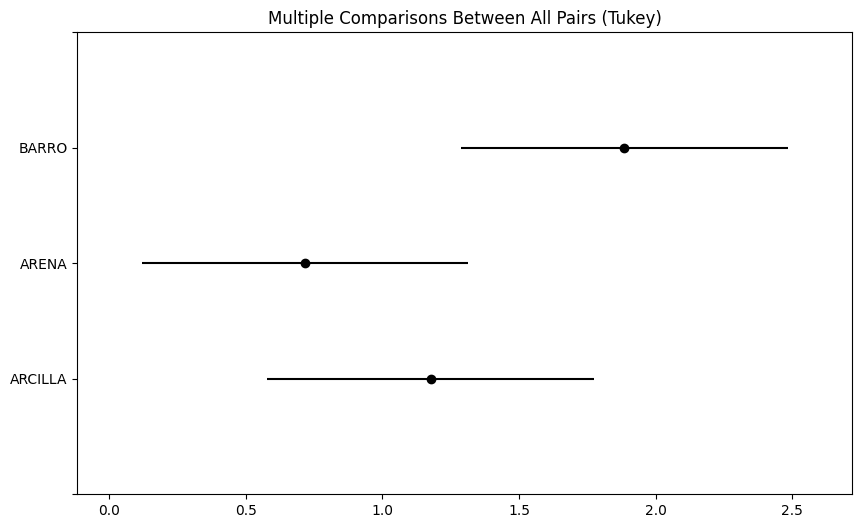

In [ ]:
tukey = pairwise_tukeyhsd(endog=datos["f"],     # Data
                          groups=datos["A"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=14.5, color="red")

tukey.summary()

In [ ]:
tukey = pairwise_tukeyhsd(endog=datos["f"],     # Data
                          groups=datos["B"],   # Groups
                          alpha=0.05)          # Significance level

#tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=49.57,ymin=-0.5,ymax=14.5, color="red")

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
2,8,-2.2178,0.0,-3.139,-1.2965,True
2,16,-2.1839,0.0,-3.1051,-1.2626,True
8,16,0.0339,0.9957,-0.8874,0.9551,False


In [ ]:
tukey = pairwise_tukeyhsd(endog=datos["f"],     # Data
                          groups=datos["C"],   # Groups
                          alpha=0.05)          # Significance level

#tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=49.57,ymin=-0.5,ymax=14.5, color="red")

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,5,0.5867,0.4212,-0.5327,1.7061,False
0,15,1.6833,0.0019,0.5639,2.8027,True
5,15,1.0967,0.056,-0.0227,2.2161,False


# **Usando R**

In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
import logging

logging.getLogger('rpy2').setLevel(logging.ERROR)

In [ ]:
%%R
install.packages("gridExtra")
install.packages("ggplot2")
library(gridExtra)
library(ggplot2)

In [ ]:
%%R
Electro_C = c(0.60,0.48,1.69,2.01,3.47,3.30,0.05,0.12,0.11,0.09,0.06,0.19,
0.07,0.06,0.08,0.14,0.22, 0.17,0.98,0.93,2.21,2.48,5.68,5.11,0.15,0.26,
0.23,0.35,0.40,0.75,0.07,0.21,0.23,0.35,0.43,0.35,1.37,1.50,3.31,2.84,5.74,
5.38,0.72,0.51,0.78,1.11,2.10,1.18,0.40,0.57,0.72,0.88,1.95,2.87)
SUELOS =factor( c(rep("ARENA",18),
                rep("ARCILLA",18),
                rep("BARRO",18)))
EC_AGUA = factor(c(rep("2",6),
                    rep("8",6),
                    rep("16",6)))
P_AGUA = factor(c(rep("0",2),
                    rep("5",2),
                    rep("15",2)))


In [ ]:
%%R
D3F = data.frame(SUELOS,EC_AGUA, P_AGUA,Electro_C)

D3F

    SUELOS EC_AGUA P_AGUA Electro_C
1    ARENA       2      0      0.60
2    ARENA       2      0      0.48
3    ARENA       2      5      1.69
4    ARENA       2      5      2.01
5    ARENA       2     15      3.47
6    ARENA       2     15      3.30
7    ARENA       8      0      0.05
8    ARENA       8      0      0.12
9    ARENA       8      5      0.11
10   ARENA       8      5      0.09
11   ARENA       8     15      0.06
12   ARENA       8     15      0.19
13   ARENA      16      0      0.07
14   ARENA      16      0      0.06
15   ARENA      16      5      0.08
16   ARENA      16      5      0.14
17   ARENA      16     15      0.22
18   ARENA      16     15      0.17
19 ARCILLA       2      0      0.98
20 ARCILLA       2      0      0.93
21 ARCILLA       2      5      2.21
22 ARCILLA       2      5      2.48
23 ARCILLA       2     15      5.68
24 ARCILLA       2     15      5.11
25 ARCILLA       8      0      0.15
26 ARCILLA       8      0      0.26
27 ARCILLA       8      5   

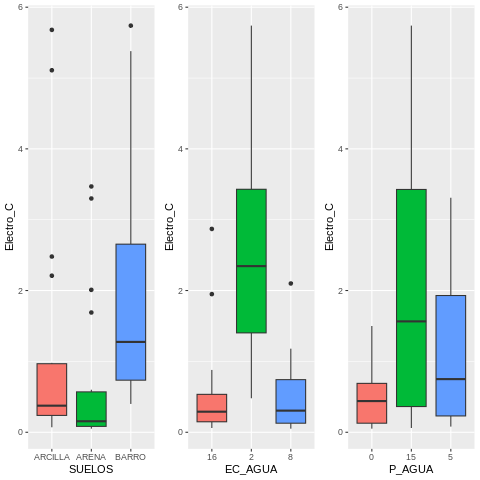

In [ ]:
%%R
SUELOS2 <- ggplot(D3F, aes(x = SUELOS, y = Electro_C, fill=SUELOS)) +
  geom_boxplot() + theme(legend.position = "none")
EC_AGUA2 <- ggplot(D3F, aes(x = EC_AGUA, y = Electro_C, fill=EC_AGUA)) +
  geom_boxplot() + theme(legend.position = "none")
P_AGUA2 <- ggplot(D3F, aes(x = P_AGUA, y = Electro_C, fill=P_AGUA)) +
  geom_boxplot() + theme(legend.position = "none")
grid.arrange(SUELOS2,EC_AGUA2,P_AGUA2, nrow=1, ncol=3)

In [ ]:
%%R
modeloD3F= lm(Electro_C ~ SUELOS*EC_AGUA*P_AGUA, D3F)
anovaD3F=aov(modeloD3F)
anovaD3F

Call:
   aov(formula = modeloD3F)

Terms:
                  SUELOS  EC_AGUA   P_AGUA SUELOS:EC_AGUA SUELOS:P_AGUA
Sum of Squares  12.46084 58.13434 26.28280        1.28458       3.03666
Deg. of Freedom        2        2        2              4             4
                EC_AGUA:P_AGUA SUELOS:EC_AGUA:P_AGUA Residuals
Sum of Squares        20.61896               1.65056   1.51575
Deg. of Freedom              4                     8        27

Residual standard error: 0.2369365
Estimated effects may be unbalanced


In [ ]:
%%R
summary(modeloD3F)


Call:
lm(formula = Electro_C ~ SUELOS * EC_AGUA * P_AGUA, data = D3F)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.46000 -0.06875  0.00000  0.06875  0.46000 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     0.1400     0.1675   0.836 0.410700    
SUELOSARENA                    -0.0750     0.2369  -0.317 0.754027    
SUELOSBARRO                     0.3450     0.2369   1.456 0.156900    
EC_AGUA2                        0.8150     0.2369   3.440 0.001907 ** 
EC_AGUA8                        0.0650     0.2369   0.274 0.785915    
P_AGUA15                        0.2500     0.2369   1.055 0.300714    
P_AGUA5                         0.1500     0.2369   0.633 0.532007    
SUELOSARENA:EC_AGUA2           -0.3400     0.3351  -1.015 0.319262    
SUELOSBARRO:EC_AGUA2            0.1350     0.3351   0.403 0.690201    
SUELOSARENA:EC_AGUA8           -0.0450     0.3351  -0.134 0.894164    
SUELOSBARRO:EC_AGUA8         

In [ ]:
%%R
summary(anovaD3F)

                      Df Sum Sq Mean Sq F value   Pr(>F)    
SUELOS                 2  12.46   6.230 110.982 9.45e-14 ***
EC_AGUA                2  58.13  29.067 517.772  < 2e-16 ***
P_AGUA                 2  26.28  13.141 234.087  < 2e-16 ***
SUELOS:EC_AGUA         4   1.28   0.321   5.721  0.00181 ** 
SUELOS:P_AGUA          4   3.04   0.759  13.523 3.57e-06 ***
EC_AGUA:P_AGUA         4  20.62   5.155  91.821 2.59e-15 ***
SUELOS:EC_AGUA:P_AGUA  8   1.65   0.206   3.675  0.00510 ** 
Residuals             27   1.52   0.056                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
TukeyHSD(anovaD3F)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = modeloD3F)

$SUELOS
                    diff        lwr        upr    p adj
ARENA-ARCILLA -0.4588889 -0.6547104 -0.2630674 1.02e-05
BARRO-ARCILLA  0.7088889  0.5130674  0.9047104 0.00e+00
BARRO-ARENA    1.1677778  0.9719563  1.3635993 0.00e+00

$EC_AGUA
            diff        lwr        upr    p adj
2-16  2.18388889  1.9880674  2.3797104 0.000000
8-16 -0.03388889 -0.2297104  0.1619326 0.903854
8-2  -2.21777778 -2.4135993 -2.0219563 0.000000

$P_AGUA
           diff        lwr        upr p adj
15-0  1.6833333  1.4875118  1.8791548 0e+00
5-0   0.5866667  0.3908452  0.7824882 2e-07
5-15 -1.0966667 -1.2924882 -0.9008452 0e+00

$`SUELOS:EC_AGUA`
                            diff          lwr        upr     p adj
ARENA:16-ARCILLA:16  -0.15000000 -0.610274865  0.3102749 0.9698033
BARRO:16-ARCILLA:16   0.95833333  0.498058468  1.4186082 0.0000051
ARCILLA:2-ARCILLA:16  2.62500000  2.164725135  3.08527

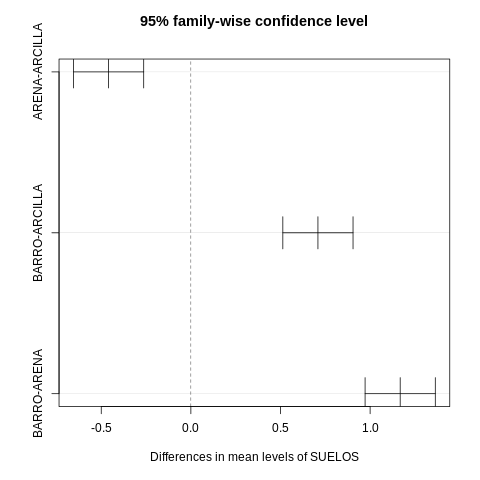

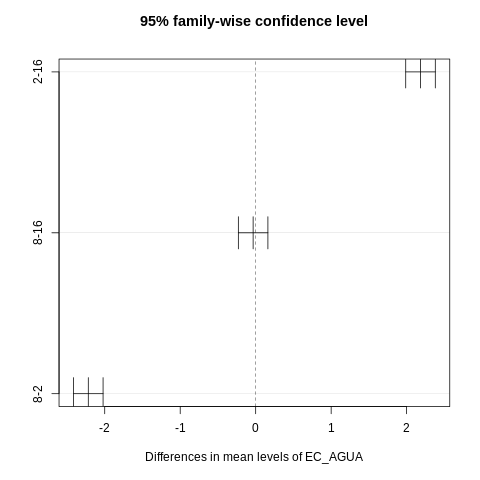

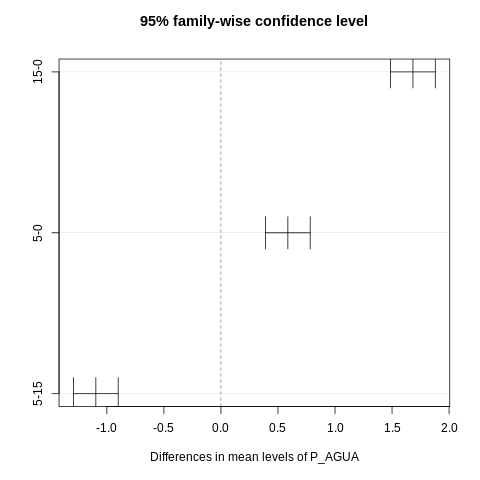

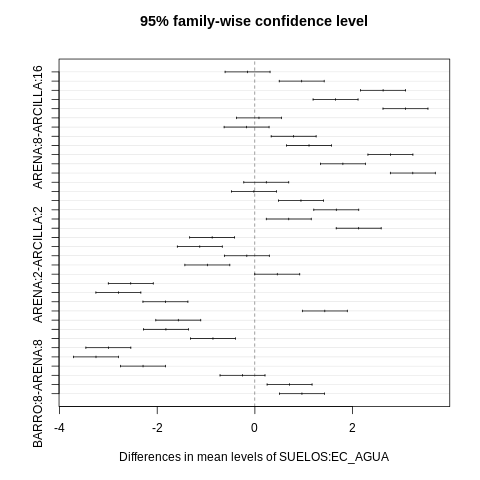

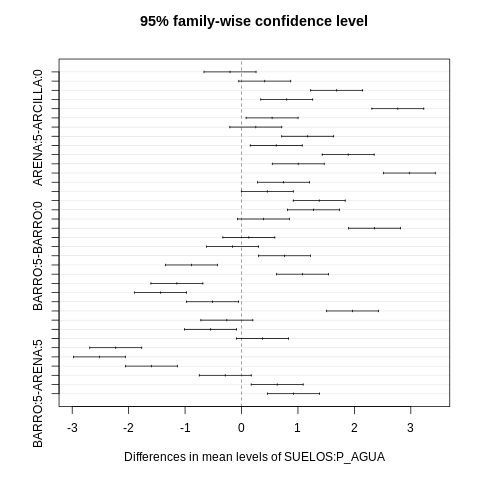

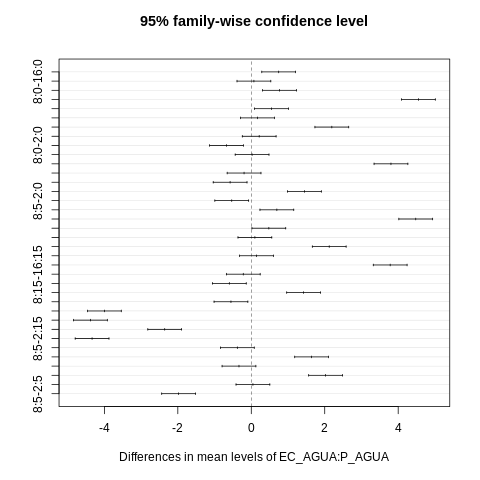

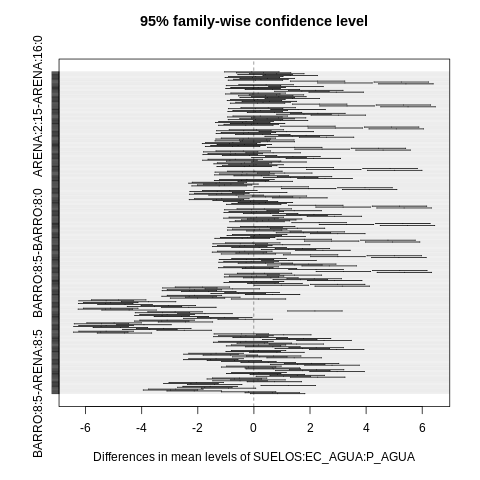

In [ ]:
%%R
plot(TukeyHSD(anovaD3F))

In [ ]:
%%R
install.packages("agricolae")
library(agricolae)

In [ ]:
%%R
LSD.test(anovaD3F,"SUELOS",console=TRUE)


Study: anovaD3F ~ "SUELOS"

LSD t Test for Electro_C 

Mean Square Error:  0.05613889 

SUELOS,  means and individual ( 95 %) CI

        Electro_C      std  r         se       LCL       UCL  Min  Max    Q25
ARCILLA 1.1761111 1.677811 18 0.05584646 1.0615236 1.2906986 0.07 5.68 0.2375
ARENA   0.7172222 1.120577 18 0.05584646 0.6026348 0.8318097 0.05 3.47 0.0825
BARRO   1.8850000 1.596339 18 0.05584646 1.7704125 1.9995875 0.40 5.74 0.7350
          Q50    Q75
ARCILLA 0.375 0.9675
ARENA   0.155 0.5700
BARRO   1.275 2.6550

Alpha: 0.05 ; DF Error: 27
Critical Value of t: 2.051831 

least Significant Difference: 0.1620512 

Treatments with the same letter are not significantly different.

        Electro_C groups
BARRO   1.8850000      a
ARCILLA 1.1761111      b
ARENA   0.7172222      c



Study: anovaD3F ~ "SUELOS"

LSD t Test for Electro_C 

Mean Square Error:  0.05613889 

SUELOS,  means and individual ( 95 %) CI

        Electro_C      std  r         se       LCL       UCL  Min  Max    Q25
ARCILLA 1.1761111 1.677811 18 0.05584646 1.0615236 1.2906986 0.07 5.68 0.2375
ARENA   0.7172222 1.120577 18 0.05584646 0.6026348 0.8318097 0.05 3.47 0.0825
BARRO   1.8850000 1.596339 18 0.05584646 1.7704125 1.9995875 0.40 5.74 0.7350
          Q50    Q75
ARCILLA 0.375 0.9675
ARENA   0.155 0.5700
BARRO   1.275 2.6550

Alpha: 0.05 ; DF Error: 27
Critical Value of t: 2.051831 

least Significant Difference: 0.1620512 

Treatments with the same letter are not significantly different.

        Electro_C groups
BARRO   1.8850000      a
ARCILLA 1.1761111      b
ARENA   0.7172222      c


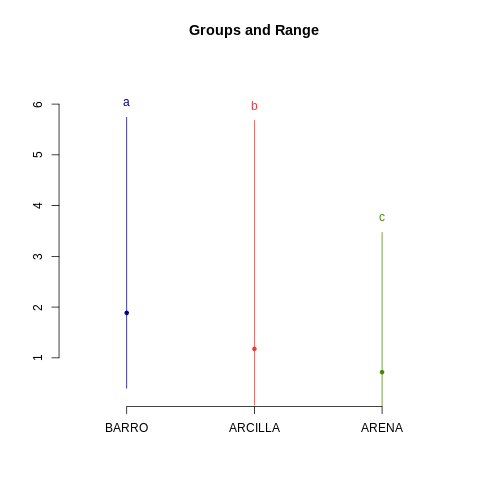

In [ ]:
%%R
plot(LSD.test(anovaD3F,"SUELOS",console=TRUE))

In [ ]:
%%R
LSD.test(anovaD3F,"EC_AGUA",console=TRUE)


Study: anovaD3F ~ "EC_AGUA"

LSD t Test for Electro_C 

Mean Square Error:  0.05613889 

EC_AGUA,  means and individual ( 95 %) CI

   Electro_C       std  r         se       LCL       UCL  Min  Max    Q25   Q50
16 0.5427778 0.7339563 18 0.05584646 0.4281903 0.6573652 0.06 2.87 0.1475 0.290
2  2.7266667 1.7634792 18 0.05584646 2.6120792 2.8412541 0.48 5.74 1.4025 2.345
8  0.5088889 0.5327386 18 0.05584646 0.3943014 0.6234764 0.05 2.10 0.1275 0.305
      Q75
16 0.5350
2  3.4300
8  0.7425

Alpha: 0.05 ; DF Error: 27
Critical Value of t: 2.051831 

least Significant Difference: 0.1620512 

Treatments with the same letter are not significantly different.

   Electro_C groups
2  2.7266667      a
16 0.5427778      b
8  0.5088889      b



Study: anovaD3F ~ "EC_AGUA"

LSD t Test for Electro_C 

Mean Square Error:  0.05613889 

EC_AGUA,  means and individual ( 95 %) CI

   Electro_C       std  r         se       LCL       UCL  Min  Max    Q25   Q50
16 0.5427778 0.7339563 18 0.05584646 0.4281903 0.6573652 0.06 2.87 0.1475 0.290
2  2.7266667 1.7634792 18 0.05584646 2.6120792 2.8412541 0.48 5.74 1.4025 2.345
8  0.5088889 0.5327386 18 0.05584646 0.3943014 0.6234764 0.05 2.10 0.1275 0.305
      Q75
16 0.5350
2  3.4300
8  0.7425

Alpha: 0.05 ; DF Error: 27
Critical Value of t: 2.051831 

least Significant Difference: 0.1620512 

Treatments with the same letter are not significantly different.

   Electro_C groups
2  2.7266667      a
16 0.5427778      b
8  0.5088889      b


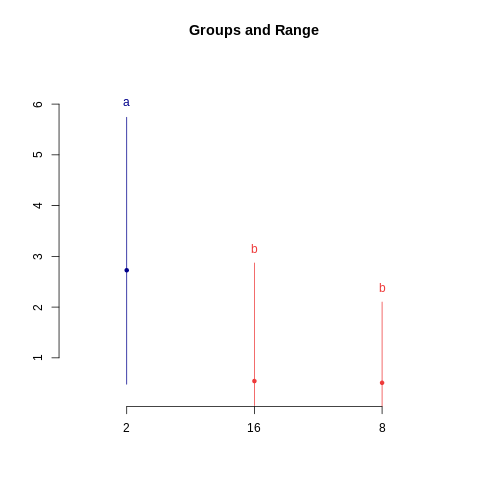

In [ ]:
%%R
plot(LSD.test(anovaD3F,"EC_AGUA",console=TRUE))

In [ ]:
%%R
LSD.test(anovaD3F,"P_AGUA",console=TRUE)


Study: anovaD3F ~ "P_AGUA"

LSD t Test for Electro_C 

Mean Square Error:  0.05613889 

P_AGUA,  means and individual ( 95 %) CI

   Electro_C       std  r         se       LCL       UCL  Min  Max    Q25   Q50
0  0.5027778 0.4485507 18 0.05584646 0.3881903 0.6173652 0.05 1.50 0.1275 0.440
15 2.1861111 2.1166376 18 0.05584646 2.0715236 2.3006986 0.06 5.74 0.3625 1.565
5  1.0894444 1.0604853 18 0.05584646 0.9748570 1.2040319 0.08 3.31 0.2300 0.750
      Q75
0  0.6900
15 3.4275
5  1.9300

Alpha: 0.05 ; DF Error: 27
Critical Value of t: 2.051831 

least Significant Difference: 0.1620512 

Treatments with the same letter are not significantly different.

   Electro_C groups
15 2.1861111      a
5  1.0894444      b
0  0.5027778      c



Study: anovaD3F ~ "P_AGUA"

LSD t Test for Electro_C 

Mean Square Error:  0.05613889 

P_AGUA,  means and individual ( 95 %) CI

   Electro_C       std  r         se       LCL       UCL  Min  Max    Q25   Q50
0  0.5027778 0.4485507 18 0.05584646 0.3881903 0.6173652 0.05 1.50 0.1275 0.440
15 2.1861111 2.1166376 18 0.05584646 2.0715236 2.3006986 0.06 5.74 0.3625 1.565
5  1.0894444 1.0604853 18 0.05584646 0.9748570 1.2040319 0.08 3.31 0.2300 0.750
      Q75
0  0.6900
15 3.4275
5  1.9300

Alpha: 0.05 ; DF Error: 27
Critical Value of t: 2.051831 

least Significant Difference: 0.1620512 

Treatments with the same letter are not significantly different.

   Electro_C groups
15 2.1861111      a
5  1.0894444      b
0  0.5027778      c


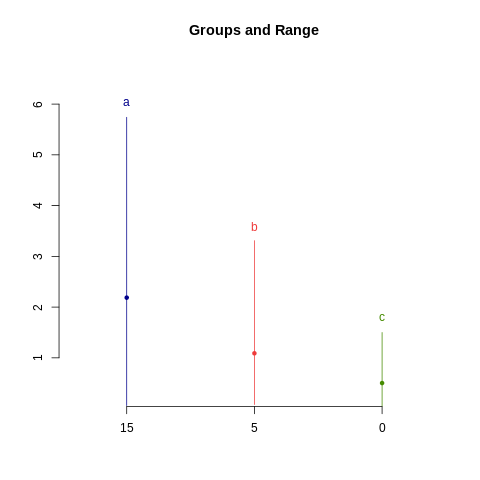

In [ ]:
%%R
plot(LSD.test(anovaD3F,"P_AGUA",console=TRUE))

In [ ]:
%%R
HSD.test(anovaD3F,"SUELOS",console=TRUE)


Study: anovaD3F ~ "SUELOS"

HSD Test for Electro_C 

Mean Square Error:  0.05613889 

SUELOS,  means

        Electro_C      std  r         se  Min  Max    Q25   Q50    Q75
ARCILLA 1.1761111 1.677811 18 0.05584646 0.07 5.68 0.2375 0.375 0.9675
ARENA   0.7172222 1.120577 18 0.05584646 0.05 3.47 0.0825 0.155 0.5700
BARRO   1.8850000 1.596339 18 0.05584646 0.40 5.74 0.7350 1.275 2.6550

Alpha: 0.05 ; DF Error: 27 
Critical Value of Studentized Range: 3.506426 

Minimun Significant Difference: 0.1958215 

Treatments with the same letter are not significantly different.

        Electro_C groups
BARRO   1.8850000      a
ARCILLA 1.1761111      b
ARENA   0.7172222      c



Study: anovaD3F ~ "SUELOS"

HSD Test for Electro_C 

Mean Square Error:  0.05613889 

SUELOS,  means

        Electro_C      std  r         se  Min  Max    Q25   Q50    Q75
ARCILLA 1.1761111 1.677811 18 0.05584646 0.07 5.68 0.2375 0.375 0.9675
ARENA   0.7172222 1.120577 18 0.05584646 0.05 3.47 0.0825 0.155 0.5700
BARRO   1.8850000 1.596339 18 0.05584646 0.40 5.74 0.7350 1.275 2.6550

Alpha: 0.05 ; DF Error: 27 
Critical Value of Studentized Range: 3.506426 

Minimun Significant Difference: 0.1958215 

Treatments with the same letter are not significantly different.

        Electro_C groups
BARRO   1.8850000      a
ARCILLA 1.1761111      b
ARENA   0.7172222      c


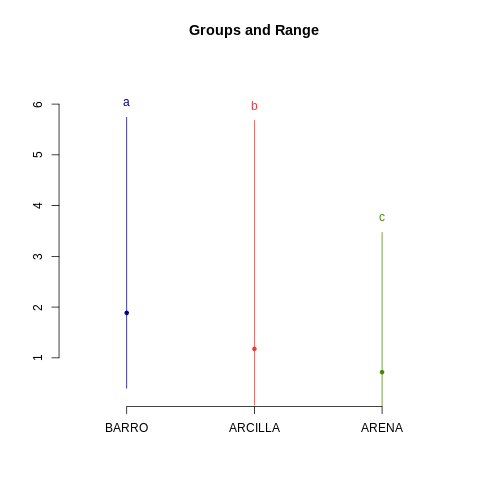

In [ ]:
%%R
plot(HSD.test(anovaD3F,"SUELOS",console=TRUE))

In [ ]:
#Prueba de Student-Newman-Keuls (SNK)
%%R
SNK.test(anovaD3F,"SUELOS",console=TRUE)


Study: anovaD3F ~ "SUELOS"

Student Newman Keuls Test
for Electro_C 

Mean Square Error:  0.05613889 

SUELOS,  means

        Electro_C      std  r         se  Min  Max    Q25   Q50    Q75
ARCILLA 1.1761111 1.677811 18 0.05584646 0.07 5.68 0.2375 0.375 0.9675
ARENA   0.7172222 1.120577 18 0.05584646 0.05 3.47 0.0825 0.155 0.5700
BARRO   1.8850000 1.596339 18 0.05584646 0.40 5.74 0.7350 1.275 2.6550

Alpha: 0.05 ; DF Error: 27 

Critical Range
        2         3 
0.1620512 0.1958215 

Means with the same letter are not significantly different.

        Electro_C groups
BARRO   1.8850000      a
ARCILLA 1.1761111      b
ARENA   0.7172222      c



Study: anovaD3F ~ "SUELOS"

Student Newman Keuls Test
for Electro_C 

Mean Square Error:  0.05613889 

SUELOS,  means

        Electro_C      std  r         se  Min  Max    Q25   Q50    Q75
ARCILLA 1.1761111 1.677811 18 0.05584646 0.07 5.68 0.2375 0.375 0.9675
ARENA   0.7172222 1.120577 18 0.05584646 0.05 3.47 0.0825 0.155 0.5700
BARRO   1.8850000 1.596339 18 0.05584646 0.40 5.74 0.7350 1.275 2.6550

Alpha: 0.05 ; DF Error: 27 

Critical Range
        2         3 
0.1620512 0.1958215 

Means with the same letter are not significantly different.

        Electro_C groups
BARRO   1.8850000      a
ARCILLA 1.1761111      b
ARENA   0.7172222      c


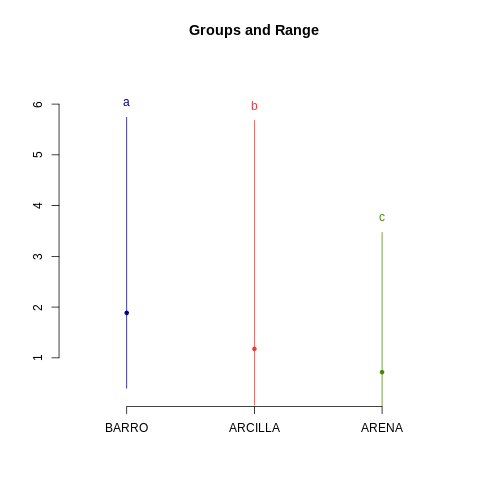

In [ ]:
#Prueba de Student-Newman-Keuls (SNK)
%%R
plot(SNK.test(anovaD3F,"SUELOS",console=TRUE))

In [ ]:
# Prueba de Scheffé
%%R
scheffe.test(anovaD3F,"SUELOS",console=TRUE)


Study: anovaD3F ~ "SUELOS"

Scheffe Test for Electro_C 

Mean Square Error  : 0.05613889 

SUELOS,  means

        Electro_C      std  r         se  Min  Max    Q25   Q50    Q75
ARCILLA 1.1761111 1.677811 18 0.05584646 0.07 5.68 0.2375 0.375 0.9675
ARENA   0.7172222 1.120577 18 0.05584646 0.05 3.47 0.0825 0.155 0.5700
BARRO   1.8850000 1.596339 18 0.05584646 0.40 5.74 0.7350 1.275 2.6550

Alpha: 0.05 ; DF Error: 27 
Critical Value of F: 3.354131 

Minimum Significant Difference: 0.2045576 

Means with the same letter are not significantly different.

        Electro_C groups
BARRO   1.8850000      a
ARCILLA 1.1761111      b
ARENA   0.7172222      c



Study: anovaD3F ~ "SUELOS"

Scheffe Test for Electro_C 

Mean Square Error  : 0.05613889 

SUELOS,  means

        Electro_C      std  r         se  Min  Max    Q25   Q50    Q75
ARCILLA 1.1761111 1.677811 18 0.05584646 0.07 5.68 0.2375 0.375 0.9675
ARENA   0.7172222 1.120577 18 0.05584646 0.05 3.47 0.0825 0.155 0.5700
BARRO   1.8850000 1.596339 18 0.05584646 0.40 5.74 0.7350 1.275 2.6550

Alpha: 0.05 ; DF Error: 27 
Critical Value of F: 3.354131 

Minimum Significant Difference: 0.2045576 

Means with the same letter are not significantly different.

        Electro_C groups
BARRO   1.8850000      a
ARCILLA 1.1761111      b
ARENA   0.7172222      c


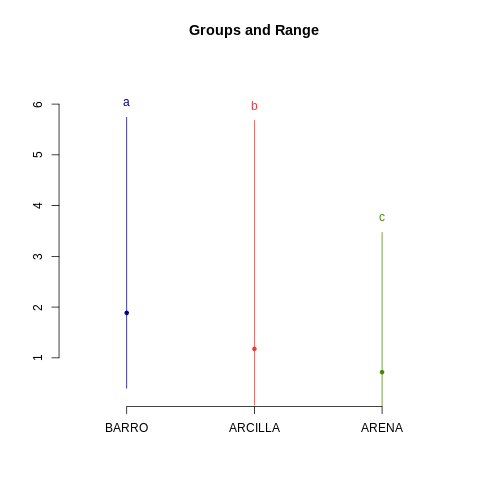

In [ ]:
# Prueba de Scheffé
%%R
plot(scheffe.test(anovaD3F,"SUELOS",console=TRUE))

In [ ]:
#(j) Prueba de Duncan
%%R
duncan.test(anovaD3F,"SUELOS",console=TRUE)


Study: anovaD3F ~ "SUELOS"

Duncan's new multiple range test
for Electro_C 

Mean Square Error:  0.05613889 

SUELOS,  means

        Electro_C      std  r         se  Min  Max    Q25   Q50    Q75
ARCILLA 1.1761111 1.677811 18 0.05584646 0.07 5.68 0.2375 0.375 0.9675
ARENA   0.7172222 1.120577 18 0.05584646 0.05 3.47 0.0825 0.155 0.5700
BARRO   1.8850000 1.596339 18 0.05584646 0.40 5.74 0.7350 1.275 2.6550

Alpha: 0.05 ; DF Error: 27 

Critical Range
        2         3 
0.1620512 0.1702570 

Means with the same letter are not significantly different.

        Electro_C groups
BARRO   1.8850000      a
ARCILLA 1.1761111      b
ARENA   0.7172222      c



Study: anovaD3F ~ "SUELOS"

Duncan's new multiple range test
for Electro_C 

Mean Square Error:  0.05613889 

SUELOS,  means

        Electro_C      std  r         se  Min  Max    Q25   Q50    Q75
ARCILLA 1.1761111 1.677811 18 0.05584646 0.07 5.68 0.2375 0.375 0.9675
ARENA   0.7172222 1.120577 18 0.05584646 0.05 3.47 0.0825 0.155 0.5700
BARRO   1.8850000 1.596339 18 0.05584646 0.40 5.74 0.7350 1.275 2.6550

Alpha: 0.05 ; DF Error: 27 

Critical Range
        2         3 
0.1620512 0.1702570 

Means with the same letter are not significantly different.

        Electro_C groups
BARRO   1.8850000      a
ARCILLA 1.1761111      b
ARENA   0.7172222      c


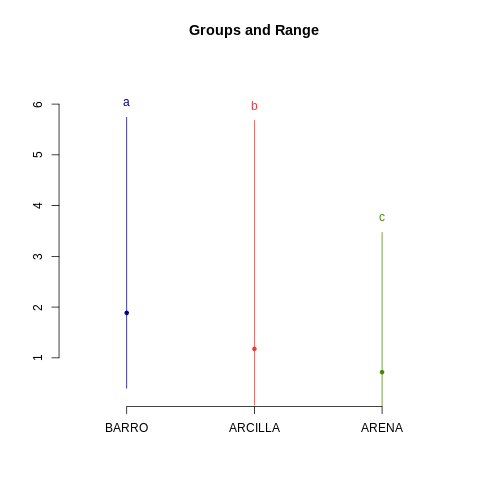

In [ ]:
#(j) Prueba de Duncan
%%R
plot(duncan.test(anovaD3F,"SUELOS",console=TRUE))

In [ ]:
#(k) Prueba de Bonferroni
%%R
bonferroni.test(anovaD3F,"SUELOS",console=TRUE)


Error in bonferroni.test(anovaD3F, "SUELOS", console = TRUE) : 
  could not find function "bonferroni.test"


In [ ]:
#3.6 Supuestos del Modelo en RStudio: Normalidad
#(a) Normalidad de los residuos
%%R
shapiro.test(anovaD3F$res)


	Shapiro-Wilk normality test

data:  anovaD3F$res
W = 0.94361, p-value = 0.01322



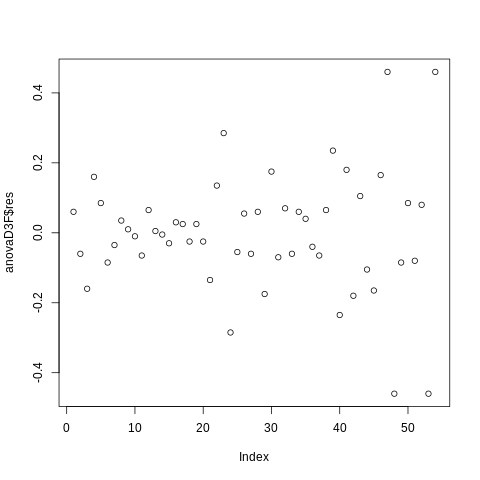

In [ ]:
%%R
plot(anovaD3F$res)

In [ ]:
%%R
sd(anovaD3F$res)
summary(anovaD3F$res)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.46000 -0.06875  0.00000  0.00000  0.06875  0.46000 


In [ ]:
%%R
sd(anovaD3F$res)

[1] 0.1691126


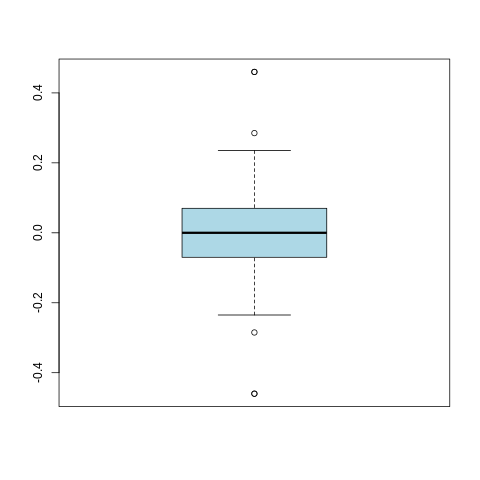

In [ ]:
%%R
boxplot(anovaD3F$res, col = 'lightblue')

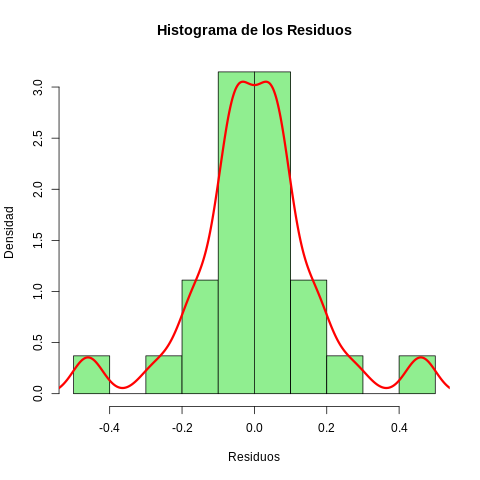

In [ ]:
%%R
#(d) Supuesto del modelo:Normalidad de los residuos
hist(anovaD3F$residuals, col="lightgreen", main = "Histograma de los Residuos",
     freq = F, xlab="Residuos",ylab="Densidad")
lines(density(anovaD3F$residuals), col="red", lwd=3)

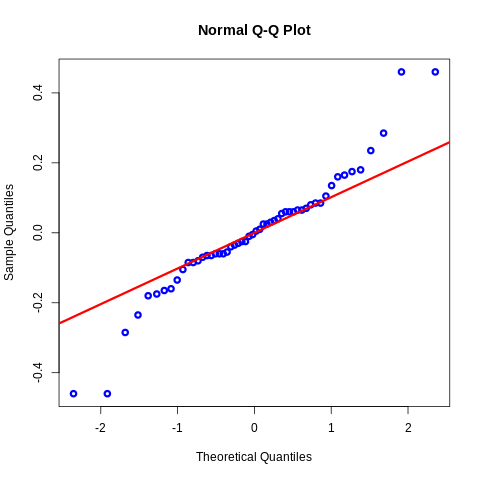

In [ ]:
# ** Prueba de Normalidad con Q-Q Plot**
%%R
qqnorm(anovaD3F$residuals,col="blue", lwd=3)
qqline(anovaD3F$residuals,col="red", lwd=3)


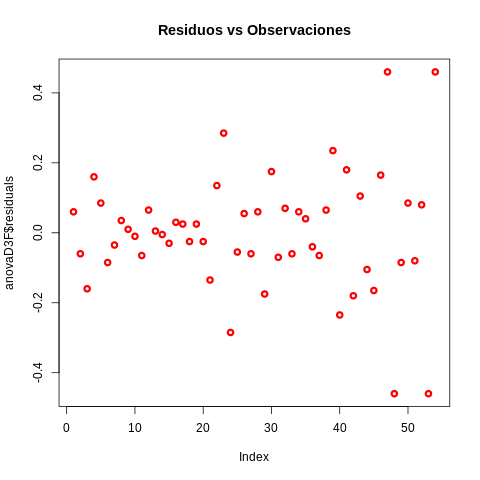

In [ ]:
# Supuesto de Independencia
%%R

plot(anovaD3F$residuals,main = "Residuos vs Observaciones",col="red", lwd=3)

In [ ]:
#(a) Homocedasticidad
%%R
bartlett.test(Electro_C~SUELOS)
#boxplot(anovaDBCA1$residuals~Bloques, xlab="Bloques",ylab="Residuos",
       # col = c("yellow", "blue", "white","green", "red"))


	Bartlett test of homogeneity of variances

data:  Electro_C by SUELOS
Bartlett's K-squared = 2.9145, df = 2, p-value = 0.2329



In [ ]:
%%R
names(anovaD3F)

 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "contrasts"     "xlevels"       "call"          "terms"        
[13] "model"        


In [ ]:
%%R
names(D3F)

[1] "SUELOS"    "EC_AGUA"   "P_AGUA"    "Electro_C"


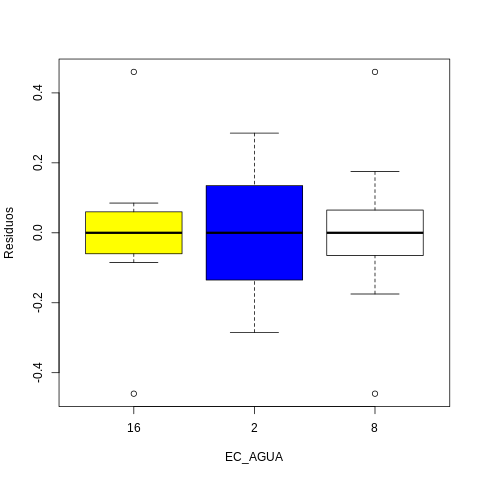

In [ ]:
#(a) Homocedasticidad
%%R
boxplot(anovaD3F$residuals~D3F$EC_AGUA, xlab="EC_AGUA",ylab="Residuos",
       col = c("yellow", "blue", "white"))

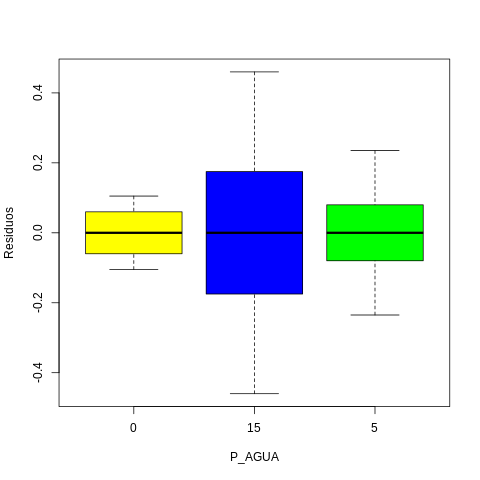

In [ ]:
#(a) Homocedasticidad
%%R
boxplot(anovaD3F$residuals~D3F$P_AGUA, xlab="P_AGUA",ylab="Residuos",
       col = c("yellow", "blue", "green"))

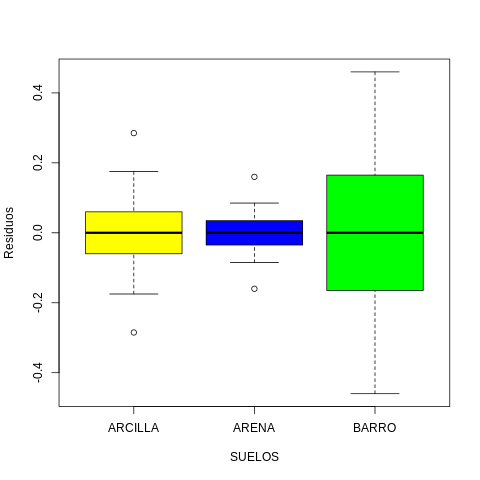

In [ ]:
#(a) Homocedasticidad
%%R
boxplot(anovaD3F$residuals~D3F$SUELOS, xlab="SUELOS",ylab="Residuos",
       col = c("yellow", "blue", "green"))